In [9]:
import os
import cv2
import matplotlib.pyplot as plt

In [10]:
from pathlib import Path

caminho_base = Path('../data/Weeds/train')
pasta_imagens = caminho_base / 'images'
pasta_labels = caminho_base / 'labels'
pasta_saida = Path('../outputs/anotadas')


In [11]:
def delimitar_bounding_boxes(image_path,label_path,cor=(255, 0, 0),espessura=2):
    imagem = cv2.imread(image_path)
    imagem=cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    altura, largura, _ = imagem.shape

    if imagem is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return None

    if os.path.exists(label_path):
        with open(label_path, 'r') as arquivo:
            linhas = arquivo.readlines()
            for linha in linhas:
                dados = linha.strip().split()
                classe, x_centro, y_centro, largura_bbox, altura_bbox = map(float, dados)

                x_centro *= largura
                y_centro *= altura
                largura_bbox *= largura
                altura_bbox *= altura

                x1 = int(x_centro - largura_bbox / 2)
                y1 = int(y_centro - altura_bbox / 2)
                x2 = int(x_centro + largura_bbox / 2)
                y2 = int(y_centro + altura_bbox / 2)

                cv2.rectangle(imagem, (x1, y1), (x2, y2), cor, espessura)
    
    return imagem


In [12]:
def exibir_imagem(imagem, titulo=None):
    plt.figure(figsize=(10, 8))
    plt.imshow(imagem)
    if titulo:
        plt.title(titulo)
    plt.axis('off')
    plt.show()


Imagem existe?  True
Label existe?   True


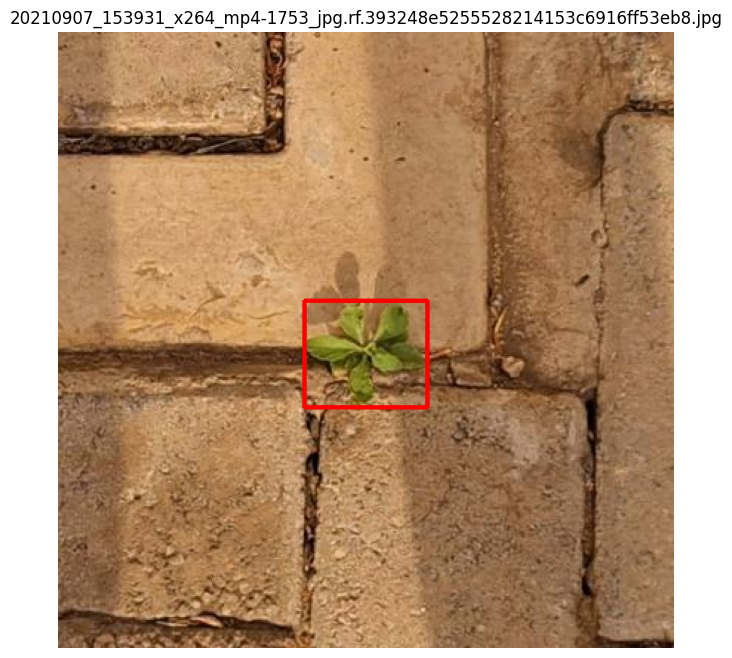

In [13]:
from pathlib import Path

# Corrigir para a pasta certa
caminho_base = Path('../data/Weeds/test')  # <- trocamos "train" por "test"

# Caminhos corretos
caminho_imagens = caminho_base / 'images'
caminho_labels = caminho_base / 'labels'

# Nome real do arquivo dentro da pasta test/images
nome_arquivo = '20210907_153931_x264_mp4-1753_jpg.rf.393248e5255528214153c6916ff53eb8.jpg'

# Gerar os caminhos completos
imagem_path = caminho_imagens / nome_arquivo
label_path = caminho_labels / (Path(nome_arquivo).stem + '.txt')

# Testar se existem
print("Imagem existe? ", imagem_path.exists())
print("Label existe?  ", label_path.exists())

# Carregar e exibir
imagem_anotada = delimitar_bounding_boxes(str(imagem_path), str(label_path))
exibir_imagem(imagem_anotada, titulo=nome_arquivo)


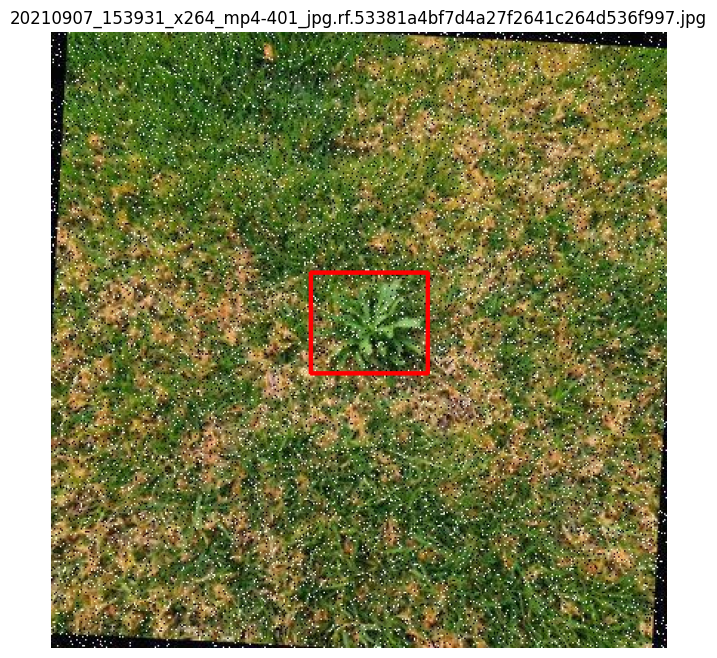

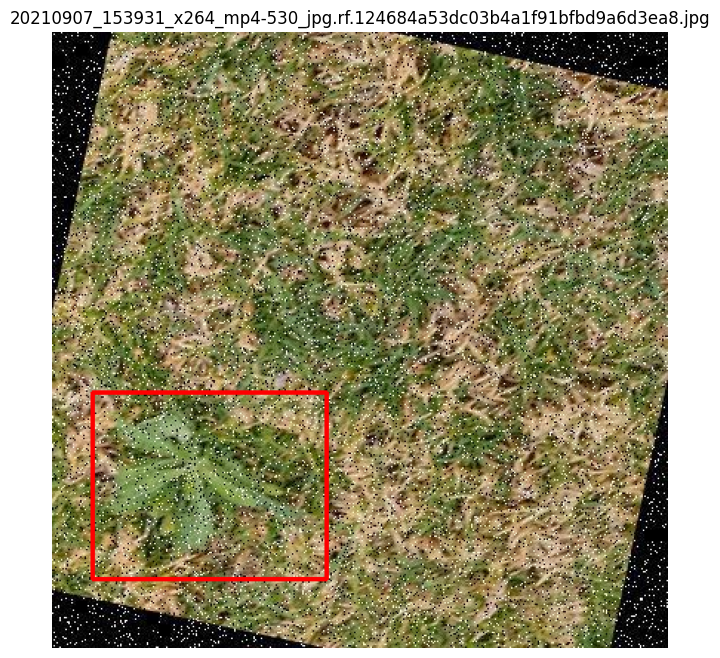

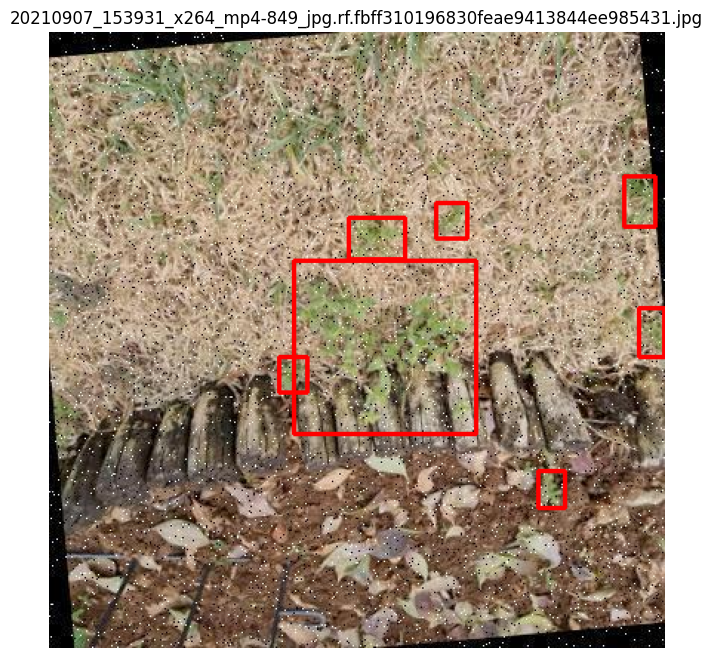

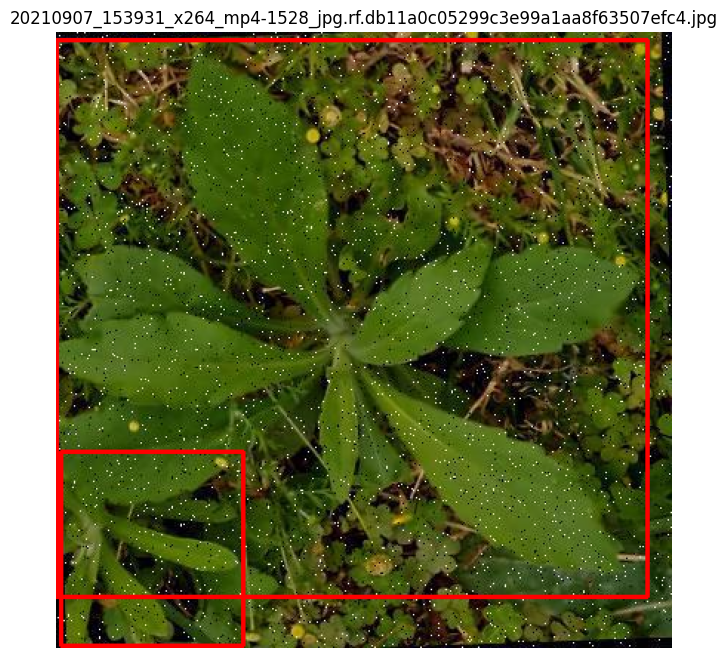

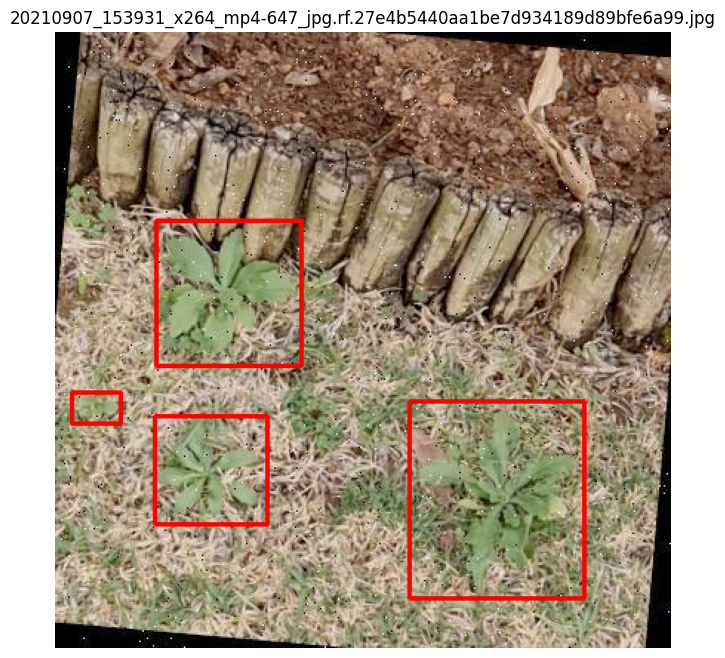

In [14]:
import random

def visualizar_varias_imagens(pasta_imagens, pasta_labels, n=5):
    """
    Visualiza n imagens aleatórias da pasta com as bounding boxes desenhadas.

    Args:
        pasta_imagens (Path): Caminho para a pasta de imagens.
        pasta_labels (Path): Caminho para a pasta de labels.
        n (int): Quantidade de imagens para visualizar.
    """
    imagens = list(pasta_imagens.glob('*.jpg'))
    amostras = random.sample(imagens, min(n, len(imagens)))

    for imagem_path in amostras:
        label_path = pasta_labels / (imagem_path.stem + '.txt')
        imagem_anotada = delimitar_bounding_boxes(imagem_path, label_path)
        exibir_imagem(imagem_anotada, titulo=imagem_path.name)
        
visualizar_varias_imagens(pasta_imagens, pasta_labels, n=5)

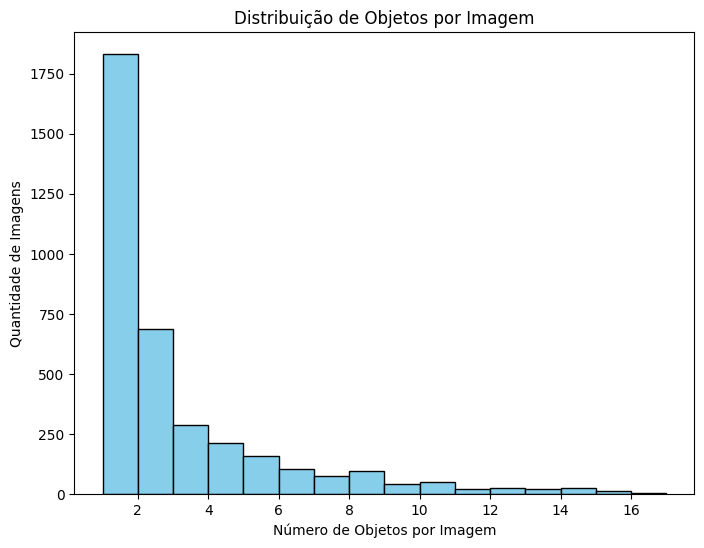

In [15]:
import matplotlib.pyplot as plt

def histograma_objetos_por_imagem(pasta_labels):
    """
    Plota histograma da quantidade de objetos anotados por imagem.

    Args:
        pasta_labels (Path): Caminho para a pasta de labels.
    """
    arquivos = list(pasta_labels.glob('*.txt'))
    num_objetos = []

    for label_path in arquivos:
        with open(label_path, 'r') as f:
            linhas = f.readlines()
            num_objetos.append(len(linhas))

    plt.figure(figsize=(8, 6))
    plt.hist(num_objetos, bins=range(1, max(num_objetos)+2), color='skyblue', edgecolor='black')
    plt.xlabel('Número de Objetos por Imagem')
    plt.ylabel('Quantidade de Imagens')
    plt.title('Distribuição de Objetos por Imagem')
    plt.show()
histograma_objetos_por_imagem(pasta_labels)

In [16]:
def salvar_imagens_anotadas(pasta_imagens, pasta_labels, pasta_saida, n=5):
    """
    Salva n imagens com bounding boxes desenhadas em uma pasta.

    Args:
        pasta_imagens (Path): Pasta de imagens.
        pasta_labels (Path): Pasta de labels.
        pasta_saida (Path): Pasta onde salvar as imagens.
        n (int): Número de imagens a salvar.
    """
    pasta_saida.mkdir(parents=True, exist_ok=True)
    imagens = list(pasta_imagens.glob('*.jpg'))
    amostras = random.sample(imagens, min(n, len(imagens)))

    for img_path in amostras:
        label_path = pasta_labels / (img_path.stem + '.txt')
        imagem_anotada = delimitar_bounding_boxes(img_path, label_path)
        if imagem_anotada is not None:
            out_path = pasta_saida / img_path.name
            imagem_bgr = cv2.cvtColor(imagem_anotada, cv2.COLOR_RGB2BGR)
            cv2.imwrite(str(out_path), imagem_bgr)
            print(f"Imagem salva: {out_path}")
    
salvar_imagens_anotadas(pasta_imagens, pasta_labels, pasta_saida, n=5)


Imagem salva: ..\outputs\anotadas\20210907_153931_x264_mp4-1006_jpg.rf.beffbb896636efdbea3de5122a28811f.jpg
Imagem salva: ..\outputs\anotadas\20210907_153931_x264_mp4-1822_jpg.rf.53b6a60978e0571130a837c4c18ec9c0.jpg
Imagem salva: ..\outputs\anotadas\20210907_153931_x264_mp4-1745_jpg.rf.b0f7ad759636697638b9e671a6ffc62f.jpg
Imagem salva: ..\outputs\anotadas\20210907_153931_x264_mp4-405_jpg.rf.73832d796ff872be67c82d6dd2741469.jpg
Imagem salva: ..\outputs\anotadas\20210907_153931_x264_mp4-1397_jpg.rf.1c365605ddbccd6e4444bf969e1fae4a.jpg
